<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

<h1>A1: Classification Model Development</h1>
<i>Computational Data Analytics with Python - DAT-5390 - Assignment Submission</i>
<br>
<br>
<br>

Written by Sanskriti Garg - Student of Master of Business Analytics<br>
Hult International Business School, San Francisco<br>
<br>
<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

In this assignment, we have developed a model to predict whether cross selling will be a success for a customer or not. 

<h3>Methodology</h3><br>

We start by exploring the dataset and understanding the data type, data format and existence of any missing values in the set.After that we divide the data into different data types (continuous, interval and categorical). We then log transform current feature, engineer new features and understand feature importance. We understand feature importance through logistic regression in statsmodel where we look at the features with significant p values and we also plot the feature importance plot as shared in the class. Basis these two, we shortlist features to try and create 4 sets potential explanatory variables for our future models. 

We use the following models to test the four sets of variables and derive the training score, test score, train-test gap and AUC score.  
<br>

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier

The final model is chosen basis the AUC score and train-test gap and then we go on and perform hyperparameter tuning on our final model. In our case there were three models which had nearby AUC score, hence we have taken these models for hyperparameter tuning.

After hyperparameter tuning, we have also plotted the confusion matrix for the final model. 

The final model that has qualified for the assignment is Decision Tree Classifier. 

We have detailed out the confusion matrix and the final model results in the end
<h3>Response Variable</h3><br>

The response variable is Cross_Sell_Success which is discrete data. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing libraries
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # data visualization
import seaborn           as sns                         # enhanced data viz
import numpy             as np                          # numpy array 
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.linear_model import LogisticRegression     # logistic regression
import statsmodels.formula.api as smf                   # logistic regression
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import plot_tree                      # tree plots

from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier     # random forest classifier
from sklearn.ensemble import GradientBoostingClassifier # gradient boosting classifier

# loading data
cross_sell = pd.read_excel(io = 'Cross_Sell_Success_Dataset_2023.xlsx' )


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
cross_sell.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [2]:
# INFOrmation about each variable
cross_sell.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

In [3]:
# Checking for missing values
cross_sell.isnull().sum(axis = 0)

CROSS_SELL_SUCCESS             0
EMAIL                          0
REVENUE                        0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

In [4]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Feature Engineering: Developing New Features</h3>
<br>

<b>a. Correcting incorrectly labeled columns<br>

Two columns have been incorrectly labeled. Below we have corrected the errors in the column name labels. 

1. LATE_DELIVERIES column has a space in the error leading to error upon being called
2. LARGEST_ORDER_SIZE is actually the average meals ordered. 

For above we have created two new columns with correct labels.


In [5]:
# Correcting erroneous columns 
# 1. Removing space from the column name 'LATE_DELIVERIES '
# 2. Correcting Column name 'LARGEST_ORDER_SIZE' to ' AVG_MEALS_ORDERED'

cross_sell['c_LATE_DELIVERIES']   = cross_sell['LATE_DELIVERIES ']
cross_sell['c_AVG_MEALS_ORDERED'] = cross_sell['LARGEST_ORDER_SIZE']

cross_sell.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

<br>
<b>b. Log transformation</b><br><br>
Log transforming features with skewness more than 1 or less than -1.

In [6]:
# log transforming features with skewness more than 1 or less than -1
cross_sell['LOG_TOTAL_MEALS_ORDERED'] = np.log(cross_sell['TOTAL_MEALS_ORDERED'] + 0.001)
cross_sell['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log(cross_sell['AVG_TIME_PER_SITE_VISIT'] + 0.001)
cross_sell['LOG_CANCELLATIONS_AFTER_NOON'] = np.log(cross_sell['CANCELLATIONS_AFTER_NOON']+ 0.001)
cross_sell['LOG_WEEKLY_PLAN'] = np.log(cross_sell['WEEKLY_PLAN'] + 0.001)
cross_sell['LOG_c_LATE_DELIVERIES'] = np.log(cross_sell['c_LATE_DELIVERIES']+ 0.001)
cross_sell['LOG_AVG_PREP_VID_TIME'] = np.log(cross_sell['AVG_PREP_VID_TIME'] + 0.001)
cross_sell['LOG_TOTAL_PHOTOS_VIEWED'] = np.log(cross_sell['TOTAL_PHOTOS_VIEWED'] + 0.001)

# Displaying INFOrmation with updated columns
cross_sell.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CROSS_SELL_SUCCESS            1946 non-null   int64  
 1   EMAIL                         1946 non-null   object 
 2   REVENUE                       1946 non-null   float64
 3   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON      1946 non-null   int64  
 9   PC_LOGINS                     1946 non-null   int64  
 10  MOBILE_LOGINS                 1946 non-null   int64  
 11  WEEKLY_PLAN                   1946 non-null   int64  
 12  LATE_DELIVERIES               1946 non-null   int64  
 13  AVG

<b>c. Contacts with customer service</b><br><br>
We also try classifying contacts with customer service. 

If the contacts with customer service are less than 10 we say that these are low contacts and assign a 0 and if the contacts are >10 we say high contacts and assign them a 1. 



In [7]:
# Feature Engineering Contacts with customer service 

# placeholder variables
cross_sell['CONT_W_CS_CAT'] = 0

for index, value in cross_sell.iterrows():
    

    # Alloting 0 if CONTACTS_W_CUSTOMER_SERVICE <10
    if cross_sell.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 10:
        cross_sell.loc[index, 'CONT_W_CS_CAT'] = 0
        
    else:
        # Alotting 1 if CONTACTS_W_CUSTOMER_SERVICE >=10
        cross_sell.loc[index, 'CONT_W_CS_CAT'] = 1
        
# checking results
cross_sell[  ['CONT_W_CS_CAT']  ].head(n = 5)

,CONT_W_CS_CAT
0,0
1,0
2,0
3,0
4,0


<b>d. Total Logins (TOTAL_LOGINS)<br></b>

We have combined the PC logins and Mobile logins to arrive at the Total Logins. 

<b>e. Cancel Proportion (CANCEL_PROP)<br></b>

This feature shows meals canceled as a proportion of total meals ordered. The assumption is that higher the percentage of cancellation proportion, lesser be success of cross sell promotion (Y-variable). 

<b>f. Photos viewed per total login (PHOTO_PER_LOGIN)</b>

We have tried to find the Photos per Total login which was calculated above. The assumption here is that higher the number of photos per login, more will be the interest of the customer in the offerings and hence more will be the likelihood of trying the cross sell promotion(Y-variable).

<b>g. Product categories viewed per total logins (PRO_CAT_LOGIN)</b>

Here we find the proportion of product categories viewed per total logins. The assumption here is if the number of categories per login is high, then the user might be interested more in the offering and hence the chances of cross sell promotion will be higher (Y-variable). <br>



In [8]:
# Engineering new features 

cross_sell['TOTAL_LOGINS']     = cross_sell['PC_LOGINS'] + cross_sell['MOBILE_LOGINS']

cross_sell['CANCEL_PROP']      = cross_sell['CANCELLATIONS_AFTER_NOON'] / cross_sell['TOTAL_MEALS_ORDERED']
cross_sell['PHOTO_PER_LOGIN']  = cross_sell['TOTAL_PHOTOS_VIEWED'] / cross_sell['TOTAL_LOGINS']
cross_sell['PRO_CAT_LOGIN']    = cross_sell['PRODUCT_CATEGORIES_VIEWED'] / cross_sell['TOTAL_LOGINS']

<b>h. Unique meals as a proportion of total meals ordered</b><br><br>
We want to see if a customer tries more unique meals does he/she be more interested in the wine promotion as they might be finding the Apprentice chef interesting and hence want to try its various offering. We are looking at the proportion of unique meals to total meals ordered.

In [9]:
# Unique meals to total meals purchased
cross_sell['UNI_PER_TOT'] = cross_sell['UNIQUE_MEALS_PURCH']/cross_sell['TOTAL_MEALS_ORDERED']


cross_sell.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,c_LATE_DELIVERIES,c_AVG_MEALS_ORDERED,LOG_TOTAL_MEALS_ORDERED,LOG_AVG_TIME_PER_SITE_VISIT,LOG_CANCELLATIONS_AFTER_NOON,LOG_WEEKLY_PLAN,LOG_c_LATE_DELIVERIES,LOG_AVG_PREP_VID_TIME,LOG_TOTAL_PHOTOS_VIEWED,CONT_W_CS_CAT,TOTAL_LOGINS,CANCEL_PROP,PHOTO_PER_LOGIN,PRO_CAT_LOGIN,UNI_PER_TOT
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,6,6.200511,5.581995,1.609638,-6.907755,-6.907755,4.922976,6.122495,0,7,0.010142,65.142857,1.428571,0.018256
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,5,5.888881,5.509392,0.693647,-6.907755,-6.907755,4.789165,6.522094,0,6,0.005540,113.333333,1.000000,0.024931
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3,5.627625,5.102309,-6.907755,1.609638,-6.907755,4.844195,4.976741,0,7,0.000000,20.714286,0.571429,0.021583
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,6,5.594715,5.170490,1.609638,-6.907755,-6.907755,4.865848,6.035484,0,7,0.018587,59.714286,0.285714,0.029740
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3,5.620404,5.103524,-6.907755,2.639129,-6.907755,3.538667,5.159061,0,7,0.000000,24.857143,1.428571,0.025362


<br><b>i. Late deliveries per total meals ordered</b><br><br>


Here we want to see if the late deliveries lead to the customer interest going down in any promotion offered by Apprentice chef. Hence, we look at late deliveries as proportion of total meals ordered to see if the higher late delivery proportion lead to a lower success rate of the cross promotion. 

In [10]:
# late deliveries proportion to total meals ordered
cross_sell['LAT_DEL_PER_TOTAL_MEALS'] = cross_sell ['c_LATE_DELIVERIES'] / cross_sell['TOTAL_MEALS_ORDERED']

cross_sell.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,c_LATE_DELIVERIES,c_AVG_MEALS_ORDERED,LOG_TOTAL_MEALS_ORDERED,LOG_AVG_TIME_PER_SITE_VISIT,LOG_CANCELLATIONS_AFTER_NOON,LOG_WEEKLY_PLAN,LOG_c_LATE_DELIVERIES,LOG_AVG_PREP_VID_TIME,LOG_TOTAL_PHOTOS_VIEWED,CONT_W_CS_CAT,TOTAL_LOGINS,CANCEL_PROP,PHOTO_PER_LOGIN,PRO_CAT_LOGIN,UNI_PER_TOT,LAT_DEL_PER_TOTAL_MEALS
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,6,6.200511,5.581995,1.609638,-6.907755,-6.907755,4.922976,6.122495,0,7,0.010142,65.142857,1.428571,0.018256,0.0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,5,5.888881,5.509392,0.693647,-6.907755,-6.907755,4.789165,6.522094,0,6,0.005540,113.333333,1.000000,0.024931,0.0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3,5.627625,5.102309,-6.907755,1.609638,-6.907755,4.844195,4.976741,0,7,0.000000,20.714286,0.571429,0.021583,0.0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,6,5.594715,5.170490,1.609638,-6.907755,-6.907755,4.865848,6.035484,0,7,0.018587,59.714286,0.285714,0.029740,0.0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3,5.620404,5.103524,-6.907755,2.639129,-6.907755,3.538667,5.159061,0,7,0.000000,24.857143,1.428571,0.025362,0.0


<b>j. Email Classification</b><br><br>

We have categorized emails basis the domain name under junk, personal and professional mails. We then do one_hot encoding to get the data ready for our model which is make the categorical data into discrete data. 


In [11]:
# Creating lists for professional, personal and junk email ids basis the email domain

# professional mails
mail_prof = ["mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com",
            "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com",
            "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com",
            "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com",
            "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com",
            "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com",
            "walmart.com"]

# personal mails
mail_pers = ["gmail.com", "yahoo.com", "protonmail.com"]

# junk mails
mail_junk = ["me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com"]


cross_sell['DOMAIN'] = cross_sell['EMAIL'].str.split('@', expand = True)[1]

# Creating the column 'EMAIL_CLASS' to classify mail ids into Professional, Personal or Junk
cross_sell['EMAIL_CLASS'] = ''

# Iterating over each observation to populate the group in the above column
for index, value in cross_sell.iterrows():

    if cross_sell.loc[index, 'DOMAIN'] in mail_prof:
        cross_sell.loc[index, 'EMAIL_CLASS'] = 'PROFESSIONAL'
    elif cross_sell.loc[index, 'DOMAIN'] in mail_pers:
        cross_sell.loc[index, 'EMAIL_CLASS'] = 'PERSONAL'
    elif cross_sell.loc[index, 'DOMAIN'] in mail_junk:
        cross_sell.loc[index, 'EMAIL_CLASS'] = 'JUNK'
    else:
        cross_sell.loc[index, 'EMAIL_CLASS'] = 'ERROR'

# Checking the results 
cross_sell.head(n=5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,c_LATE_DELIVERIES,c_AVG_MEALS_ORDERED,LOG_TOTAL_MEALS_ORDERED,LOG_AVG_TIME_PER_SITE_VISIT,LOG_CANCELLATIONS_AFTER_NOON,LOG_WEEKLY_PLAN,LOG_c_LATE_DELIVERIES,LOG_AVG_PREP_VID_TIME,LOG_TOTAL_PHOTOS_VIEWED,CONT_W_CS_CAT,TOTAL_LOGINS,CANCEL_PROP,PHOTO_PER_LOGIN,PRO_CAT_LOGIN,UNI_PER_TOT,LAT_DEL_PER_TOTAL_MEALS,DOMAIN,EMAIL_CLASS
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,6,6.200511,5.581995,1.609638,-6.907755,-6.907755,4.922976,6.122495,0,7,0.010142,65.142857,1.428571,0.018256,0.0,yahoo.com,PERSONAL
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,5,5.888881,5.509392,0.693647,-6.907755,-6.907755,4.789165,6.522094,0,6,0.005540,113.333333,1.000000,0.024931,0.0,visa.com,PROFESSIONAL
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3,5.627625,5.102309,-6.907755,1.609638,-6.907755,4.844195,4.976741,0,7,0.000000,20.714286,0.571429,0.021583,0.0,protonmail.com,PERSONAL
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,6,5.594715,5.170490,1.609638,-6.907755,-6.907755,4.865848,6.035484,0,7,0.018587,59.714286,0.285714,0.029740,0.0,yahoo.com,PERSONAL
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3,5.620404,5.103524,-6.907755,2.639129,-6.907755,3.538667,5.159061,0,7,0.000000,24.857143,1.428571,0.025362,0.0,jnj.com,PROFESSIONAL


In [12]:
# one hot encoding for email classificaton
one_hot_EMAIL_CLASS = pd.get_dummies(cross_sell['EMAIL_CLASS']) #converts everything in one and zeroes

cross_sell = cross_sell.join([one_hot_EMAIL_CLASS])

cross_sell.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,c_LATE_DELIVERIES,c_AVG_MEALS_ORDERED,LOG_TOTAL_MEALS_ORDERED,LOG_AVG_TIME_PER_SITE_VISIT,LOG_CANCELLATIONS_AFTER_NOON,LOG_WEEKLY_PLAN,LOG_c_LATE_DELIVERIES,LOG_AVG_PREP_VID_TIME,LOG_TOTAL_PHOTOS_VIEWED,CONT_W_CS_CAT,TOTAL_LOGINS,CANCEL_PROP,PHOTO_PER_LOGIN,PRO_CAT_LOGIN,UNI_PER_TOT,LAT_DEL_PER_TOTAL_MEALS,DOMAIN,EMAIL_CLASS,JUNK,PERSONAL,PROFESSIONAL
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,6,6.200511,5.581995,1.609638,-6.907755,-6.907755,4.922976,6.122495,0,7,0.010142,65.142857,1.428571,0.018256,0.0,yahoo.com,PERSONAL,0,1,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,5,5.888881,5.509392,0.693647,-6.907755,-6.907755,4.789165,6.522094,0,6,0.005540,113.333333,1.000000,0.024931,0.0,visa.com,PROFESSIONAL,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3,5.627625,5.102309,-6.907755,1.609638,-6.907755,4.844195,4.976741,0,7,0.000000,20.714286,0.571429,0.021583,0.0,protonmail.com,PERSONAL,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,6,5.594715,5.170490,1.609638,-6.907755,-6.907755,4.865848,6.035484,0,7,0.018587,59.714286,0.285714,0.029740,0.0,yahoo.com,PERSONAL,0,1,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3,5.620404,5.103524,-6.907755,2.639129,-6.907755,3.538667,5.159061,0,7,0.000000,24.857143,1.428571,0.025362,0.0,jnj.com,PROFESSIONAL,0,0,1


<h3>Correlation Analysis</h3><br>

To understand the correlation of different variables with 'CROSS_SELL_SUCCESS', we look at the pearson correlation of the variables. 

In [13]:
# checking correlation between x-variables and response variable - cross_sell_success
df_corr = cross_sell.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS              1.00
PROFESSIONAL                    0.19
CANCELLATIONS_AFTER_NOON        0.14
LOG_CANCELLATIONS_AFTER_NOON    0.12
CANCEL_PROP                     0.10
TOTAL_LOGINS                    0.07
MOBILE_LOGINS                   0.06
PERSONAL                        0.04
PC_LOGINS                       0.04
UNIQUE_MEALS_PURCH              0.04
AVG_TIME_PER_SITE_VISIT         0.03
LOG_AVG_TIME_PER_SITE_VISIT     0.03
LOG_TOTAL_MEALS_ORDERED         0.02
c_LATE_DELIVERIES               0.02
LOG_AVG_PREP_VID_TIME           0.02
LOG_c_LATE_DELIVERIES           0.02
c_AVG_MEALS_ORDERED             0.02
LARGEST_ORDER_SIZE              0.02
LATE_DELIVERIES                 0.02
TOTAL_MEALS_ORDERED             0.01
AVG_PREP_VID_TIME               0.01
LOG_TOTAL_PHOTOS_VIEWED         0.01
CONT_W_CS_CAT                   0.01
TOTAL_PHOTOS_VIEWED             0.01
PRODUCT_CATEGORIES_VIEWED       0.00
CONTACTS_W_CUSTOMER_SERVICE    -0.00
PHOTO_PER_LOGIN                 0.00
R

In [14]:
# checking value counts for discrete data (email classification)
cross_sell[['CROSS_SELL_SUCCESS', 'JUNK']][cross_sell['JUNK'] == 1].value_counts(normalize = True)

CROSS_SELL_SUCCESS  JUNK
0                   1       0.583548
1                   1       0.416452
dtype: float64

In [15]:
cross_sell[['CROSS_SELL_SUCCESS', 'PROFESSIONAL']][cross_sell['PROFESSIONAL'] == 1].value_counts(normalize = True)

CROSS_SELL_SUCCESS  PROFESSIONAL
1                   1               0.800287
0                   1               0.199713
dtype: float64

In [16]:
cross_sell[['CROSS_SELL_SUCCESS', 'PERSONAL']][cross_sell['PERSONAL'] == 1].value_counts(normalize = True)

CROSS_SELL_SUCCESS  PERSONAL
1                   1           0.699187
0                   1           0.300813
dtype: float64

<i><b>Note:</b></i>In value_counts above, we see there is huge split between success of cross sell and non-success of cross-sell for professional and personal emails. Hence in our model we will try these two and drop 'JUNK' from model testing.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Building Logistic Regression in statsmodel using explanatory variables</h3><br>
We will now run a logistic regression in statsmodel to understand the significance of the above variables. We will then remove the insignificant variables and only retain the significant ones. 

<h4>Preparing Explanatory and Response variables</h4>

In [17]:
# Explanatory variables
x_data = cross_sell.drop(['CROSS_SELL_SUCCESS','EMAIL'],axis = 1)

# Response variable
cross_sell_target  =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']

In [18]:
# train - test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    cross_sell_target,
                                                    test_size    = 0.25,
                                                    random_state = 219,
                                                    stratify     = cross_sell_target) #stratifying

cross_sell_train = pd.concat([x_train, y_train], axis = 1)

In [19]:
# checking train and test y variable split
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [20]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = "CROSS_SELL_SUCCESS ~ PROFESSIONAL",
                           data = cross_sell_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.611507
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.026     
Dependent Variable: CROSS_SELL_SUCCESS AIC:              1788.3775 
Date:               2023-03-03 22:16   BIC:              1798.9486 
No. Observations:   1459               Log-Likelihood:   -892.19   
Df Model:           1                  LL-Null:          -916.19   
Df Residuals:       1457               LLR p-value:      4.2418e-12
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     5.0000                                         
---------------------------------------------------------------------
                Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       0.4745     0.0672   7.0591   0.0000   0.3428   0.6063
PROFESSIONAL    0.8484     0.1266   6.7011   0.0000   0.6003   1.0966
===================================================================

"""

In [21]:
for val in x_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES  + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 c_LATE_DELIVERIES + 
 c_AVG_MEALS_ORDERED + 
 LOG_TOTAL_MEALS_ORDERED + 
 LOG_AVG_TIME_PER_SITE_VISIT + 
 LOG_CANCELLATIONS_AFTER_NOON + 
 LOG_WEEKLY_PLAN + 
 LOG_c_LATE_DELIVERIES + 
 LOG_AVG_PREP_VID_TIME + 
 LOG_TOTAL_PHOTOS_VIEWED + 
 CONT_W_CS_CAT + 
 TOTAL_LOGINS + 
 CANCEL_PROP + 
 PHOTO_PER_LOGIN + 
 PRO_CAT_LOGIN + 
 UNI_PER_TOT + 
 LAT_DEL_PER_TOTAL_MEALS + 
 DOMAIN + 
 EMAIL_CLASS + 
 JUNK + 
 PERSONAL + 
 PROFESSIONAL + 


In [22]:
# Builidng the logistic regression model in statsmodel with variables with significant p-values
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """CROSS_SELL_SUCCESS ~  
                                                                 UNIQUE_MEALS_PURCH+
                                                                  
                                                                  AVG_TIME_PER_SITE_VISIT +
                                                                  CANCELLATIONS_AFTER_NOON 
                                                        
                                                                 """,
                           data = cross_sell_train)
                                  

# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.615570
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.020     
Dependent Variable:   CROSS_SELL_SUCCESS  AIC:               1804.2338 
Date:                 2023-03-03 22:16    BIC:               1825.3758 
No. Observations:     1459                Log-Likelihood:    -898.12   
Df Model:             3                   LL-Null:           -916.19   
Df Residuals:         1455                LLR p-value:       6.9505e-08
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
Intercept                -0.2004   0.2517 -0.7959 0.4261 -0.6937 0.2930
UNIQUE_MEALS_PURCH        0.0438   0.0247  1.7748 0.0759 -0.0046 0.0922
AVG_TIME_PER_SITE_VISIT   0.0023   0.0012  1.9748 0.0483  0.0000 0.0047
CANCELLATIONS_AFTER_NOON  0.1973   0.0390  5.0544 0.0000  0.1208 0.2738
=======================================================================

"""

In [23]:
# Builidng the logistic regression model in statsmodel with variables with significant p-values
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """CROSS_SELL_SUCCESS ~  REVENUE + 
                                                                 TOTAL_MEALS_ORDERED + 
                                                                 UNIQUE_MEALS_PURCH + 
                                                               
                                                                 PRODUCT_CATEGORIES_VIEWED + 
                                                                 AVG_TIME_PER_SITE_VISIT + 
                                                                 CANCELLATIONS_AFTER_NOON + 
                                                                 c_LATE_DELIVERIES + 
                                                                  
                                                               
                                                                 PRO_CAT_LOGIN + 
                                                                
                                                                 PERSONAL + 
                                                                 PROFESSIONAL  

                                                        
                                                                 """,
                           data = cross_sell_train)
                                  

# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.567909
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                Logit                Pseudo R-squared:   0.096     
Dependent Variable:   CROSS_SELL_SUCCESS   AIC:                1679.1579 
Date:                 2023-03-03 22:16     BIC:                1737.2985 
No. Observations:     1459                 Log-Likelihood:     -828.58   
Df Model:             10                   LL-Null:            -916.19   
Df Residuals:         1448                 LLR p-value:        2.2890e-32
Converged:            1.0000               Scale:              1.0000    
No. Iterations:       6.0000                                             
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 -1.4598   0.3182 -4.5873 0.0000 -2.0834 -0.8361
REVENUE                   -0.0001   0.0001 -1.2443 0.2134 -0.0003  0.0001
TOTAL_MEALS_ORDERED        0.0006   0.0014  0.4555 0.6487 -0.0021  0.0034
UNIQUE_MEALS_PURCH         0.0575   0.0265  2.1709 0.0299  0.0056  0.1094
PRODUCT_CATEGORIES_VIEWED  0.3015   0.0856  3.5213 0.0004  0.1337  0.4693
AVG_TIME_PER_SITE_VISIT    0.0033   0.0017  1.9527 0.0509 -0.0000  0.0066
CANCELLATIONS_AFTER_NOON   0.2173   0.0411  5.2825 0.0000  0.1367  0.2980
c_LATE_DELIVERIES          0.0140   0.0161  0.8731 0.3826 -0.0175  0.0456
PRO_CAT_LOGIN             -2.0935   0.5603 -3.7366 0.0002 -3.1916 -0.9954
PERSONAL                   1.2766   0.1518  8.4115 0.0000  0.9792  1.5741
PROFESSIONAL               1.7539   0.1653 10.6114 0.0000  1.4300  2.0779
=========================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Feature Importance</h3><br>

We will now look at feature importance for one of the classifiers to get a directional understanding which feature might be important for classification. Here we will use the function taught in class to find important feature for the Cart Model.

Here we look at feature importance for gradient boosting classifier. We run the classifier first and then plot the feature importance. 


In [24]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [25]:
# preparing the data

x_data = cross_sell.drop(['CROSS_SELL_SUCCESS','EMAIL', 'DOMAIN', 'EMAIL_CLASS'], axis =1)
y_data = cross_sell.loc[:,'CROSS_SELL_SUCCESS']

x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

In [26]:
# INSTANTIATING a classification tree object
model = GradientBoostingClassifier()

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', model_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', model_fit.score(x_test,
                                                     y_test).round(4))

gap = model_fit.score(x_train,y_train).round(4) - model_fit.score(x_test,y_test).round(4)

print('Full Tree Train Test GAP: ', gap.round(4) )

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = model_pred).round(4))


# saving scoring data for future use
model_train_score = model_fit.score(x_train, y_train).round(4) # accuracy
model_test_score  = model_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
model_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = model_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7971
Full Tree Testing ACCURACY : 0.7166
Full Tree Train Test GAP:  0.0805
Full Tree AUC Score: 0.6107


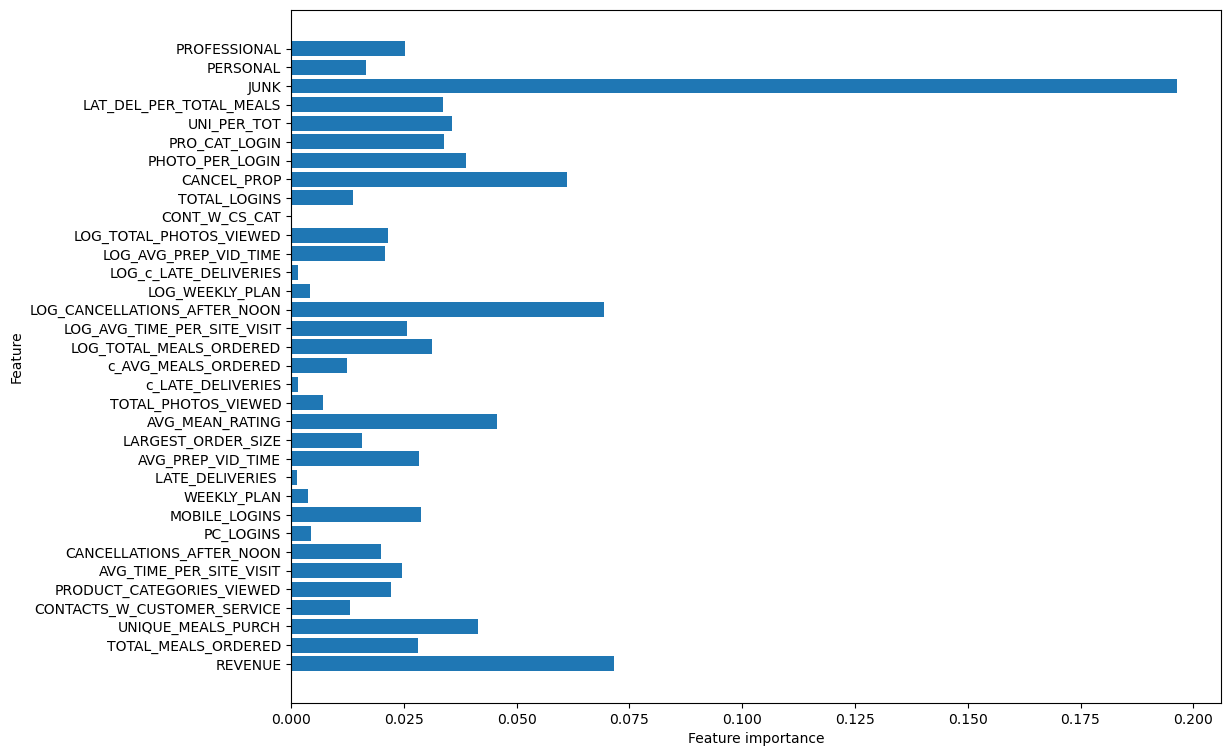

In [27]:
plot_feature_importances(model, train = x_data, export = False)

As per the above feature importance for <b>Gradient Boosting Classifier</b> CART model we have the following features that might be important:

1. JUNK
2. CANCEL_PROP
3. LOG_CANCELLATIONS_AFTER_NOON
4. AVG_MEAN_RATING
5. REVENUE
6. UNIQUE_MEALS_PURCHASED
7. PROFESSIONAL
8. LAT_DEL_PER_TOT_MEALS
9. UNI_PER_TOTAL
10. PHOTO_PER_LOGIN



Below we have created a dictionary of explanatory variables which can have an impact on the response variable. The sets of explanatory variables are basis significant variable that we arrived at in statsmodel and variables that we tried and tested through feature importance graph and using in different models. 

<i><b>Note:</b></i> We have run the models multiple using different variables sets as well to arrive at the below list of features and hence the below list is not solely on the statsmodel and feature importance plot. 

In [28]:
# creating a dictionary to store candidate models

candidate_dict = {

 
 # significant variables only 
 'set_1'    : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'c_LATE_DELIVERIES',
                   'PRO_CAT_LOGIN', 'PERSONAL' ,'PROFESSIONAL'],
    
    
 'set_2'  : ['JUNK','CANCELLATIONS_AFTER_NOON','AVG_MEAN_RATING',
              'AVG_TIME_PER_SITE_VISIT', 'UNI_PER_TOT','LAT_DEL_PER_TOTAL_MEALS'],
    
 'set_3' : ['CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'PERSONAL', 'PROFESSIONAL'],
    
 'set_4' :['JUNK', 'CANCEL_PROP', 'LOG_CANCELLATIONS_AFTER_NOON', 'AVG_MEAN_RATING', 'REVENUE',
            'UNIQUE_MEALS_PURCH' , 'PROFESSIONAL' , 'LAT_DEL_PER_TOTAL_MEALS' , 'UNI_PER_TOT', 'PHOTO_PER_LOGIN']   

 }

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Classification Modeling</h3><br>
Trying the below models for the above set of candidate variables

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier

We will choose the best combination of explanatory variables and classification model to arrive at the model we will tune and make the final model.

<h4>Running the Set - 1 of explanatory variables</h4>
<br>

Running the first set of explanatory variables:<br>

'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED',               'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'c_LATE_DELIVERIES', 'PRO_CAT_LOGIN', 'PERSONAL' ,'PROFESSIONAL'


In [29]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [30]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, 
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test , y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test , y_test).round(4) # accuracy

Training ACCURACY: 0.6779
Testing  ACCURACY: 0.6797
AUC Score        : 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# INSTANTIATING a classification tree object
dec_tree = DecisionTreeClassifier()


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Decision Tree Classifier AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))


# saving scoring data for future use
Dec_tree_train_score_set_1 = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_set_1  = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_set_1   = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 1.0
Decision Tree Classifier Testing ACCURACY : 0.6016
Decision Tree Classifier AUC Score: 0.551


In [32]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
random_for = RandomForestClassifier()                 


# FITTING the training data
random_for_fit = random_for.fit(x_train, y_train)


# PREDICTING on new data
random_for_pred = random_for_fit.predict(x_test)


# SCORING the model
print('Random Forest Training ACCURACY:', random_for_fit.score(x_train,
                                                     y_train).round(4))

print('Random Forest Testing ACCURACY :', random_for_fit.score(x_test,
                                                     y_test).round(4))

gap = random_for_fit.score(x_train,y_train).round(4) - random_for_fit.score(x_test,y_test).round(4)

print('Random Forest Train Test GAP: ', gap.round(4) )

print('Random Forest AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = random_for_pred).round(4))


# saving scoring data for future use
random_for_train_score_set_1 = random_for_fit.score(x_train, y_train).round(4) # accuracy
random_for_test_score_set_1  = random_for_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
random_for_auc_score_set_1   = roc_auc_score(y_true  = y_test,
                                      y_score = random_for_pred).round(4) # auc

Random Forest Training ACCURACY: 1.0
Random Forest Testing ACCURACY : 0.7064
Random Forest Train Test GAP:  0.2936
Random Forest AUC Score: 0.5993


In [33]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# INSTANTIATING a classification tree object
grad_b = GradientBoostingClassifier()


# FITTING the training data
grad_b_fit = grad_b.fit(x_train, y_train)


# PREDICTING on new data
grad_b_pred = grad_b_fit.predict(x_test)


# SCORING the model
print('Gradient Boosting Training ACCURACY:', grad_b_fit.score(x_train,
                                                     y_train).round(4))

print('Gradient Boosting Testing ACCURACY :', grad_b_fit.score(x_test,
                                                     y_test).round(4))

gap = grad_b_fit.score(x_train,y_train).round(4) - grad_b_fit.score(x_test,y_test).round(4)

print('Gradient Boosting Train Test GAP: ', gap.round(4) )

print('Gradient Boosting AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = grad_b_pred).round(4))


# saving scoring data for future use
grad_b_train_score_set_1 = grad_b_fit.score(x_train, y_train).round(4) # accuracy
grad_b_test_score_set_1  = grad_b_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
grad_b_auc_score_set_1   = roc_auc_score(y_true  = y_test,
                                      y_score = grad_b_pred).round(4) # auc

Gradient Boosting Training ACCURACY: 0.7937
Gradient Boosting Testing ACCURACY : 0.7125
Gradient Boosting Train Test GAP:  0.0812
Gradient Boosting AUC Score: 0.6123


<h4>Running all models with Set_2 variables</h4><br>
Running the second set of explanatory variables:<br>
'JUNK','CANCELLATIONS_AFTER_NOON','AVG_MEAN_RATING',
 'AVG_TIME_PER_SITE_VISIT', 'UNI_PER_TOT','LAT_DEL_PER_TOTAL_MEALS'

In [34]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [35]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, 
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test , y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))


# saving scoring data for future use
logreg_train_score_set_2 = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score_set_2  = logreg_fit.score(x_test , y_test).round(4) # accuracy

Training ACCURACY: 0.7217
Testing  ACCURACY: 0.729
AUC Score        : 0.6261


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# INSTANTIATING a classification tree object
dec_tree = DecisionTreeClassifier()


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Decision Tree Classifier AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))


# saving scoring data for future use
Dec_tree_train_score_set_2 = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_set_2 = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_set_2  = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 1.0
Decision Tree Classifier Testing ACCURACY : 0.6078
Decision Tree Classifier AUC Score: 0.5505


In [37]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
random_for = RandomForestClassifier()                 


# FITTING the training data
random_for_fit = random_for.fit(x_train, y_train)


# PREDICTING on new data
random_for_pred = random_for_fit.predict(x_test)


# SCORING the model
print('Random Forest Training ACCURACY:', random_for_fit.score(x_train,
                                                     y_train).round(4))

print('Random Forest Testing ACCURACY :', random_for_fit.score(x_test,
                                                     y_test).round(4))

gap = random_for_fit.score(x_train,y_train).round(4) - random_for_fit.score(x_test,y_test).round(4)

print('Random Forest Train Test GAP: ', gap.round(4) )

print('Random Forest AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = random_for_pred).round(4))


# saving scoring data for future use
random_for_train_score_set_2 = random_for_fit.score(x_train, y_train).round(4) # accuracy
random_for_test_score_set_2  = random_for_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
random_for_auc_score_set_2  = roc_auc_score(y_true  = y_test,
                                      y_score = random_for_pred).round(4) # auc

Random Forest Training ACCURACY: 1.0
Random Forest Testing ACCURACY : 0.6961
Random Forest Train Test GAP:  0.3039
Random Forest AUC Score: 0.6002


In [38]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# INSTANTIATING a classification tree object
grad_b = GradientBoostingClassifier()


# FITTING the training data
grad_b_fit = grad_b.fit(x_train, y_train)


# PREDICTING on new data
grad_b_pred = grad_b_fit.predict(x_test)


# SCORING the model
print('Gradient Boosting Training ACCURACY:', grad_b_fit.score(x_train,
                                                     y_train).round(4))

print('Gradient Boosting Testing ACCURACY :', grad_b_fit.score(x_test,
                                                     y_test).round(4))

gap = grad_b_fit.score(x_train,y_train).round(4) - grad_b_fit.score(x_test,y_test).round(4)

print('Gradient Boosting Train Test GAP: ', gap.round(4) )

print('Gradient Boosting AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = grad_b_pred).round(4))


# saving scoring data for future use
grad_b_train_score_set_2 = grad_b_fit.score(x_train, y_train).round(4) # accuracy
grad_b_test_score_set_2  = grad_b_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
grad_b_auc_score_set_2  = roc_auc_score(y_true  = y_test,
                                      y_score = grad_b_pred).round(4) # auc

Gradient Boosting Training ACCURACY: 0.782
Gradient Boosting Testing ACCURACY : 0.7187
Gradient Boosting Train Test GAP:  0.0633
Gradient Boosting AUC Score: 0.6151


<h4>Running Set_3 of the explanatory variables</h4><br>

Running the third set of explanatory variables:<br>
'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'PERSONAL', 'PROFESSIONAL'

In [39]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_3']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [40]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, 
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test , y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test , y_test).round(4) # accuracy

Training ACCURACY: 0.7224
Testing  ACCURACY: 0.7207
AUC Score        : 0.6166


In [41]:
# INSTANTIATING a classification tree object
dec_tree = DecisionTreeClassifier()


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Decision Tree Classifier AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))


# saving scoring data for future use
Dec_tree_train_score_set_3 = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_set_3  = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_set_3  = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 0.7382
Decision Tree Classifier Testing ACCURACY : 0.7207
Decision Tree Classifier AUC Score: 0.6285


In [42]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
random_for = RandomForestClassifier()                 


# FITTING the training data
random_for_fit = random_for.fit(x_train, y_train)


# PREDICTING on new data
random_for_pred = random_for_fit.predict(x_test)


# SCORING the model
print('Random Forest Training ACCURACY:', random_for_fit.score(x_train,
                                                     y_train).round(4))

print('Random Forest Testing ACCURACY :', random_for_fit.score(x_test,
                                                     y_test).round(4))

gap = random_for_fit.score(x_train,y_train).round(4) - random_for_fit.score(x_test,y_test).round(4)

print('Random Forest Train Test GAP: ', gap.round(4) )

print('Random Forest AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = random_for_pred).round(4))


# saving scoring data for future use
random_for_train_score_set_3 = random_for_fit.score(x_train, y_train).round(4) # accuracy
random_for_test_score_set_3  = random_for_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
random_for_auc_score_set_3  = roc_auc_score(y_true  = y_test,
                                      y_score = random_for_pred).round(4) # auc

Random Forest Training ACCURACY: 0.7382
Random Forest Testing ACCURACY : 0.7228
Random Forest Train Test GAP:  0.0154
Random Forest AUC Score: 0.6266


In [43]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# INSTANTIATING a classification tree object
grad_b = GradientBoostingClassifier()


# FITTING the training data
grad_b_fit = grad_b.fit(x_train, y_train)


# PREDICTING on new data
grad_b_pred = grad_b_fit.predict(x_test)


# SCORING the model
print('Gradient Boosting Training ACCURACY:', grad_b_fit.score(x_train,
                                                     y_train).round(4))

print('Gradient Boosting Testing ACCURACY :', grad_b_fit.score(x_test,
                                                     y_test).round(4))

gap = grad_b_fit.score(x_train,y_train).round(4) - grad_b_fit.score(x_test,y_test).round(4)

print('Gradient Boosting Train Test GAP: ', gap.round(4) )

print('Gradient Boosting AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = grad_b_pred).round(4))


# saving scoring data for future use
grad_b_train_score_set_3 = grad_b_fit.score(x_train, y_train).round(4) # accuracy
grad_b_test_score_set_3  = grad_b_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
grad_b_auc_score_set_3  = roc_auc_score(y_true  = y_test,
                                      y_score = grad_b_pred).round(4) # auc

Gradient Boosting Training ACCURACY: 0.7341
Gradient Boosting Testing ACCURACY : 0.729
Gradient Boosting Train Test GAP:  0.0051
Gradient Boosting AUC Score: 0.6295


<h4>Running Set-4 of explanatory variables</h4><br>

Running the fourth set of explanatory variables:<br>
'JUNK', 'CANCEL_PROP', 'LOG_CANCELLATIONS_AFTER_NOON', 'AVG_MEAN_RATING', 'REVENUE',
'UNIQUE_MEALS_PURCH' , 'PROFESSIONAL' , 'LAT_DEL_PER_TOTAL_MEALS' , 'UNI_PER_TOT', 'PHOTO_PER_LOGIN'

In [44]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_4']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [45]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, 
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test , y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test , y_test).round(4) # accuracy

Training ACCURACY: 0.7142
Testing  ACCURACY: 0.7064
AUC Score        : 0.5976


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# INSTANTIATING a classification tree object
dec_tree = DecisionTreeClassifier()


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Decision Tree Classifier AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))


# saving scoring data for future use
Dec_tree_train_score_set_4 = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_set_4  = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_set_4  = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 1.0
Decision Tree Classifier Testing ACCURACY : 0.6057
Decision Tree Classifier AUC Score: 0.549


In [47]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
random_for = RandomForestClassifier()                 


# FITTING the training data
random_for_fit = random_for.fit(x_train, y_train)


# PREDICTING on new data
random_for_pred = random_for_fit.predict(x_test)


# SCORING the model
print('Random Forest Training ACCURACY:', random_for_fit.score(x_train,
                                                     y_train).round(4))

print('Random Forest Testing ACCURACY :', random_for_fit.score(x_test,
                                                     y_test).round(4))

gap = random_for_fit.score(x_train,y_train).round(4) - random_for_fit.score(x_test,y_test).round(4)

print('Random Forest Train Test GAP: ', gap.round(4) )

print('Random Forest AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = random_for_pred).round(4))


# saving scoring data for future use
random_for_train_score_set_4 = random_for_fit.score(x_train, y_train).round(4) # accuracy
random_for_test_score_set_4  = random_for_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
random_for_auc_score_set_4  = roc_auc_score(y_true  = y_test,
                                      y_score = random_for_pred).round(4) # auc

Random Forest Training ACCURACY: 1.0
Random Forest Testing ACCURACY : 0.6961
Random Forest Train Test GAP:  0.3039
Random Forest AUC Score: 0.5951


In [48]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# INSTANTIATING a classification tree object
grad_b = GradientBoostingClassifier()


# FITTING the training data
grad_b_fit = grad_b.fit(x_train, y_train)


# PREDICTING on new data
grad_b_pred = grad_b_fit.predict(x_test)


# SCORING the model
print('Gradient Boosting Training ACCURACY:', grad_b_fit.score(x_train,
                                                     y_train).round(4))

print('Gradient Boosting Testing ACCURACY :', grad_b_fit.score(x_test,
                                                     y_test).round(4))

gap = grad_b_fit.score(x_train,y_train).round(4) - grad_b_fit.score(x_test,y_test).round(4)

print('Gradient Boosting Train Test GAP: ', gap.round(4) )

print('Gradient Boosting AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = grad_b_pred).round(4))


# saving scoring data for future use
grad_b_train_score_set_4 = grad_b_fit.score(x_train, y_train).round(4) # accuracy
grad_b_test_score_set_4  = grad_b_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
grad_b_auc_score_set_4  = roc_auc_score(y_true  = y_test,
                                      y_score = grad_b_pred).round(4) # auc

Gradient Boosting Training ACCURACY: 0.7848
Gradient Boosting Testing ACCURACY : 0.7187
Gradient Boosting Train Test GAP:  0.0661
Gradient Boosting AUC Score: 0.6185


The explanatory variables 'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'PERSONAL', 'PROFESSIONAL' gives us the best AUC score. We will goahead with these variables. We will hyper parameter tune Decision Tree Classifier, Random Forest Classifier and  Gradient boosting classifier as they have given a good AUC score. 

<h3>Hyperparameter Tuning</h3><br>
We will now try hyper parameter tuning to see if the model performance can be improved.

In [49]:
# re-declaring the final variables

# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : ,['CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'PERSONAL', 'PROFESSIONAL']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [50]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [51]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [52]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

<h3>Hyperparameter Tuning: Decision Tree Classifier</h3>

In [53]:
#declaring hyperparameters for Decision Tree Classifier

criterion_range                  = ['gini', 'entropy']                 # criterion
splitter_range                   = ['best','random']                   # splitter
max_depth_range                  = range(1,8,1)                        # max_depth
min_samples_leaf_range           = range(1,10,1)                       # min_samples_leaf 


In [54]:
# from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning

# # creating a hyperparameter grid for decision tree
# param_grid = {'criterion'               : criterion_range, 
#               'splitter'                : splitter_range,  
#               'max_depth'               : max_depth_range,
#               'min_samples_leaf'        : min_samples_leaf_range}


# # INSTANTIATING the Gradient Boosting Regressor model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 219)

# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, # model we are using
#                                    param_distributions   = param_grid, # tuning ranges declared above (dictionary)
#                                    cv                    = 5,          # how many folds we want 
#                                    n_iter                = 200,        # max models we want to build 
#                                    random_state          = 219)        


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(cross_sell_data, cross_sell_target) 

# # printing the optimal parameters and best score
# print("Tuned Parameters       :", tuned_tree_cv.best_params_)
# print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters       : {'splitter': 'random', 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training R-Square: 0.7266


The above parameters give a lower result than the below parameters. We have arrived at the below parameters from trial error.

In [55]:
# INSTANTIATING a classification tree object
dec_tree = DecisionTreeClassifier(splitter= 'random', 
                                  min_samples_leaf= 3, 
                                  max_depth = 5, 
                                  criterion= 'gini',
                                  random_state = 219)


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Decision Tree Classifier AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))


# saving scoring data for future use
Dec_tree_train_score_set_3 = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_set_3  = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_set_3  = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 0.7204
Decision Tree Classifier Testing ACCURACY : 0.7207
Decision Tree Classifier AUC Score: 0.6404


<h3>Hyperparameter Tuning: Random Forest Classifier</h3>

In [56]:
# declaring hyperparameters for Random Forest Classifier
criterion_range             = ['gini', 'entropy']                       # criterion
n_estimators_range          = range(50, 150 , 5)                        # n_estimators
max_depth_range             = range(1, 8, 1)                            # max_depth 
min_samples_leaf_range      = range(1,8,1)                              # min_samples_leaf

In [57]:
# # creating a hyperparameter grid for forest tree
# param_grid = {'criterion'             : criterion_range, 
#               'n_estimators'     : n_estimators_range,  
#               'max_depth'        : max_depth_range,
#                'min_samples_leaf': min_samples_leaf_range}


# # INSTANTIATING the Gradient Boosting Regressor model object without hyperparameters
# tuned_tree = RandomForestClassifier(random_state = 219)

# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, # model we are using
#                                    param_distributions   = param_grid, # tuning ranges declared above (dictionary)
#                                    cv                    = 5,          # how many folds we want 
#                                    n_iter                = 400,        # max models we want to build 
#                                    random_state          = 219)        


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(cross_sell_data, cross_sell_target) 

# # printing the optimal parameters and best score
# print("Tuned Parameters       :", tuned_tree_cv.best_params_)
# print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters       : {'n_estimators': 95, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'entropy'}
Tuned Training R-Square: 0.7271


In [58]:
#Hypertuned Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
random_for = RandomForestClassifier(criterion         =  'gini', 
                                    n_estimators      =  145,  
                                    max_depth         =  6,
                                    min_samples_leaf  =  2,
                                   random_state = 219)                 


# FITTING the training data
random_for_fit = random_for.fit(x_train, y_train)


# PREDICTING on new data
random_for_pred = random_for_fit.predict(x_test)


# SCORING the model
print('Random Forest Training ACCURACY:', random_for_fit.score(x_train,
                                                     y_train).round(4))

print('Random Forest Testing ACCURACY :', random_for_fit.score(x_test,
                                                     y_test).round(4))

gap = random_for_fit.score(x_train,y_train).round(4) - random_for_fit.score(x_test,y_test).round(4)

print('Random Forest Train Test GAP: ', gap.round(4) )

print('Random Forest AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = random_for_pred).round(4))


# saving scoring data for future use
random_for_train_score_set_3 = random_for_fit.score(x_train, y_train).round(4) # accuracy
random_for_test_score_set_3  = random_for_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
random_for_auc_score_set_3  = roc_auc_score(y_true  = y_test,
                                      y_score = random_for_pred).round(4) # auc

Random Forest Training ACCURACY: 0.7334
Random Forest Testing ACCURACY : 0.729
Random Forest Train Test GAP:  0.0044
Random Forest AUC Score: 0.6244


<h3>Hyperparameter Tuning: Gradient Boosting Classifier</h3>

In [59]:
# declaring hyperparameters for Gradient Boosting Classifier
loss_range                  = ['deviance', 'exponential']               # loss_range
n_estimators_range          = range(50, 150 , 5)                        # n_estimators
max_depth_range             = range(1, 8, 1)                            # max_depth 
min_samples_leaf_range      = range(1,8,1)                              # min_samples_leaf

In [60]:
# # creating a hyperparameter grid for classifier tree
# param_grid = {'loss'             : loss_range, 
#               'n_estimators'     : n_estimators_range,  
#               'max_depth'        : max_depth_range,
#                'min_samples_leaf': min_samples_leaf_range}


# # INSTANTIATING the Gradient Boosting classifier model object without hyperparameters
# tuned_tree = GradientBoostingClassifier(random_state = 219)

# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, # model we are using
#                                    param_distributions   = param_grid, # tuning ranges declared above (dictionary)
#                                    cv                    = 5,          # how many folds we want 
#                                    n_iter                = 400,        # max models we want to build 
#                                    random_state          = 219)        


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(cross_sell_data, cross_sell_target) 

# # printing the optimal parameters and best score
# print("Tuned Parameters       :", tuned_tree_cv.best_params_)
# print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters       : {'n_estimators': 145, 'min_samples_leaf': 7, 'max_depth': 1, 'loss': 'deviance'}
Tuned Training R-Square: 0.7256


These parameters do not give the best AUC score and hence after trial and error below is the model for gradient boosting classifier. 

In [61]:
# INSTANTIATING a classification tree object
model = GradientBoostingClassifier(    loss               = 'deviance',    
                                       max_depth          = 2,              
                                       n_estimators       = 80,  
                                       min_samples_leaf   = 7,
                                       random_state       = 219
                                       )                 


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', model_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', model_fit.score(x_test,
                                                     y_test).round(4))

gap = model_fit.score(x_train,y_train).round(4) - model_fit.score(x_test,y_test).round(4)

print('Full Tree Train Test GAP: ', gap.round(4) )

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = model_pred).round(4))


# saving scoring data for future use
model_train_score = model_fit.score(x_train, y_train).round(4) # accuracy
model_test_score  = model_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
model_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = model_pred).round(4) # auc

Full Tree Training ACCURACY: 0.732
Full Tree Testing ACCURACY : 0.731
Full Tree Train Test GAP:  0.001
Full Tree AUC Score: 0.631


<h3><b>Final Model</b></h3><br>
The final model that we will go ahead with is <b>Decision Tree Classifier</b>



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Confusion Matrix</h3>

We now plot the confusion matrix for our final model. But before that we run our final model. 

In [62]:
#Final Model

# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : ,['CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'PERSONAL', 'PROFESSIONAL']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

In [63]:
# INSTANTIATING a classification tree object

model_name = 'Decision Tree Classifier'

dec_tree = DecisionTreeClassifier(splitter= 'random', 
                                  min_samples_leaf= 3, 
                                  max_depth = 5, 
                                  criterion= 'gini',
                                  random_state = 219)


# FITTING the training data
dec_tree_fit = dec_tree.fit(x_train, y_train)


# PREDICTING on new data
dec_tree_pred = dec_tree_fit.predict(x_test)


# SCORING the model
print('Decision Tree Classifier Training ACCURACY:', dec_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Decision Tree Classifier Testing ACCURACY :', dec_tree_fit.score(x_test,
                                                     y_test).round(4))

dec_gap = dec_tree_fit.score(x_train, y_train).round(4) - dec_tree_fit.score(x_test,y_test).round(4)

print('Decision Tree Classifier Train-Test Gap   :', dec_gap.round(4))

print('Decision Tree Classifier AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = dec_tree_pred).round(4))



# saving scoring data for future use
Dec_tree_train_score_final = dec_tree_fit.score(x_train, y_train).round(4) # accuracy
Dec_tree_test_score_final = dec_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
Dec_tree_auc_score_final = roc_auc_score(y_true  = y_test,
                                      y_score = dec_tree_pred).round(4) # auc

Decision Tree Classifier Training ACCURACY: 0.7204
Decision Tree Classifier Testing ACCURACY : 0.7207
Decision Tree Classifier Train-Test Gap   : -0.0003
Decision Tree Classifier AUC Score        : 0.6404


In [64]:
# Printing the confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = dec_tree_pred))

[[ 65  91]
 [ 45 286]]


In [65]:
# unpacking the confusion matrix
dec_tn, \
dec_fp, \
dec_fn, \
dec_tp = confusion_matrix(y_true = y_test, y_pred = dec_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {dec_tn}
False Positives: {dec_fp}
False Negatives: {dec_fn}
True Positives : {dec_tp}
""")


True Negatives : 65
False Positives: 91
False Negatives: 45
True Positives : 286



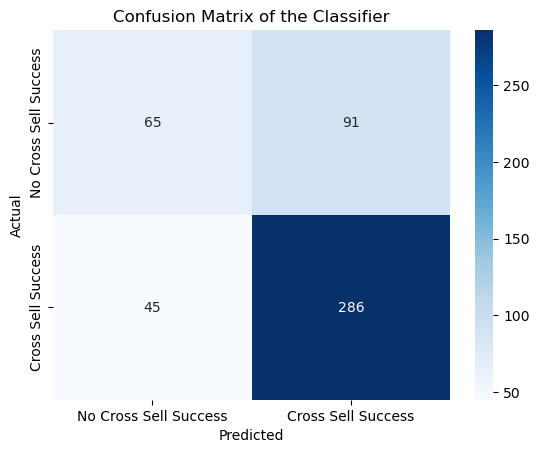

In [66]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = dec_tree_pred,
          labels = ['No Cross Sell Success', 'Cross Sell Success'])

<h3>Model Explaination</h3><br>

The final Decision Tree Classifier model has a training accuracy of 0.7204 and a testing accuracy of 0.7207, which means that the model is performing well on the unseen data as well.

The AUC score of 0.64 indicates that the model has moderate power to differentiate between negative and positive cases. However, lower train-test gap ensures that there is no over fitting that has happened in the model. 

However, even though the model correctly predicted 351 cases correctly, which is good, it did not predict the others quite well. 

The model incorrectly predicted 91 false positives, which is not desirable and 45 false negatives.
 
Hence there is scope improvement in the model. 

For our model:
<br><br>

~~~
                                                 |
  PREDICTED: NO CROSS SELL SUCCESS (0)           |  PREDICTED: CROSS SELL SUCCESS    (1)  
  ACTUAL:    NO CROSS SELL SUCCESS (0)           |  ACTUAL:    NO CROSS SELL SUCCESS (0) 
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  PREDICTED: NO CROSS SELL SUCCESS (0)           |  PREDICTED: CROSS SELL SUCCESS (1)
  ACTUAL:    CROSS SELL SUCCESS    (1)           |  ACTUAL:    CROSS SELL SUCCESS (1)
                                                 |  
~~~


Having high false positives like in this case can mislead the company to think that the promotion works very efficiently and there is no need to evaluate anything on the promotion. However, on ground the reality might be that the promotion is working for certain kind of customer and not working for other cohort of customer and may need a change in the promotion itself in terms of attractiveness or might need more marketing to increase awareness about it. 

A high number of true positives does indicate that the promotion works and in turn might be leading to high sales and revenue for Apprentice chef.

In [67]:
#Displaying final result

# comparing results
print(f"""

***************************************************
                  FINAL MODEL

Model Name        : {model_name}
           
Training Accuracy : {Dec_tree_train_score_final}
           
Testing Accuracy  : {Dec_tree_test_score_final}

Train - Test Gap  : {dec_gap.round(4)}

AUC Score         : {Dec_tree_auc_score_final}

Confusion Matrix  : True Negatives : {dec_tn}
                    False Positives: {dec_fp}
                    False Negatives: {dec_fn}
                    True Positives : {dec_tp}

***************************************************""")



***************************************************
                  FINAL MODEL

Model Name        : Decision Tree Classifier
           
Training Accuracy : 0.7204
           
Testing Accuracy  : 0.7207

Train - Test Gap  : -0.0003

AUC Score         : 0.6404

Confusion Matrix  : True Negatives : 65
                    False Positives: 91
                    False Negatives: 45
                    True Positives : 286

***************************************************
